<a href="https://colab.research.google.com/github/smile-rr/tensor-flow-developer/blob/main/tf_w2_lab1_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
index = 5
np.set_printoptions(linewidth = 320)
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]})')
print(f"image shape:{training_images[index].shape}")

LABEL: 2

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.00392157 0.         0.         0.         0.         0.08627451 0.34509804 0.7372549  0.6745098  0.51764706 0.49019608 0.55294118 0.78039216 0.56078431 0.03529412 0.         0.         0.         0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.         0.07843137 0.51372549 0.78039216 0.80784314 0.76862745 0.79215686 0.94901961 1.         1.         0.98039216 0.87058824 0.77254902 0.80784314 0.7372549  0.49411765 0.06666667 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.1372549  0.83921569 0.74901961 0.71764706 0.69803922 0.68627451 0.65882353 0.58823529 0.63529412 0.62352941 0.59607843 0.61960784 0.70196078 0.71764706 0.74117647 0.76470588 0.7254902  0.32156863 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

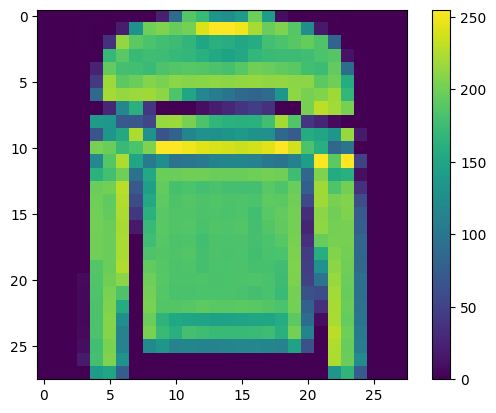

In [11]:
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [12]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [16]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.nn.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [17]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7843 - loss: 0.6276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8629 - loss: 0.3870
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8767 - loss: 0.3352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8855 - loss: 0.3125
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8919 - loss: 0.2925


In [18]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8736 - loss: 0.3456


[0.3436738848686218, 0.875]

In [21]:
classifications = model.predict(test_images)
print(f"predicat: {classifications[5]}")
print(f"expected: {test_labels[5]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predicat: [1.9521632e-03 9.9756819e-01 1.2883834e-04 5.6634053e-05 2.7512537e-05 4.9372245e-10 2.6624228e-04 1.7896616e-11 5.0866896e-07 9.2048857e-09]
expected: 1


In [25]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(training_images, training_labels, epochs=15)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, test_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {test_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7982 - loss: 0.5818
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8634 - loss: 0.3736
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8824 - loss: 0.3189
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8895 - loss: 0.3008
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8976 - loss: 0.2795
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9020 - loss: 0.2666
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9053 - loss: 0.2531
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9110 - loss: 0.2369
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9133 - loss: 0.2317
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9181 - loss: 0.2181
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9196 - loss: 0.2141
Epoch 12/

In [31]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs['loss'] < 0.4:
      print("\nLoss is lower than 0.4, so cancelling the training")
      self.model.stop_training = True

callbacks = myCallbackmodel = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[myCallback()])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7921 - loss: 0.5920
Epoch 2/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.3644
Loss is lower than 0.4, so cancelling the training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8659 - loss: 0.3644
